In [2]:
import numpy as np
import matplotlib.pyplot as plt
from entidades.SimulatedPhoton import SimulatedPhoton
from utilidades.optica import reflect, refract
from entidades.estructura import Esfera

# Reflexión y refracción

In [3]:
foton1 = SimulatedPhoton(1, dire = np.array([0, 1, 0]))
n = np.array([1, -1, 0])
# Normaliza n con numpy
n = n / np.linalg.norm(n)
print(n)
print(foton1.dire)
refl_dir = reflect(foton1.dire, n)
print(np.arccos(np.dot(refl_dir, n)))
trans_dir = refract(foton1.dire, n, 1, 2)
print(trans_dir)
print(np.arccos(np.dot(trans_dir, -n)))

[ 0.70710678 -0.70710678  0.        ]
[0. 1. 0.]
0.7853981633974487
[-0.41143783  0.91143783  0.        ]
0.36136712390670817


# Estructuras

In [4]:
def dibujar_interseccion_esfera_foton(esfera, foton):
  interseccion, n = esfera.interseccion(foton)
  # Dibujamos la esfera
  x, y = esfera.getPlotCoords()
  plt.plot(x, y)
  plt.xlim(-2,2)
  plt.ylim(0,4)

  # Dibujar origen y vector de direccion
  plt.scatter(foton.pos[0], foton.pos[1], c='b')
  plt.quiver(foton.pos[0], foton.pos[1],
            foton.dire[0], foton.dire[1], color='b')
  plt.quiver(interseccion[0], interseccion[1], n[0], n[1], color='g')
  plt.axis('equal')
  

  # Dibujamos segmento de trayectoria
  plt.plot([foton.pos[0], interseccion[0]], [foton.pos[1], interseccion[1]], c='b')

  plt.scatter(interseccion[0], interseccion[1], c='r')
  # plt.scatter(interseccion_2[0], interseccion_2[1], c='r')
  plt.show()

In [5]:
# Generamos una esfera de radio 0.5 y centro en el 1, 1
f_dentro = SimulatedPhoton(1, pos = np.array([0, 1.2, 0]), dire = np.array([0, 1, 0]), spa = 1)
f_fuera = SimulatedPhoton(2, pos = np.array([0, 0.8, 0]), dire = np.array([0, 1, 0]), spa = 0)
f_fuera_2 = SimulatedPhoton(3, pos = np.array([0, 0.8, 0]), dire = np.array([0, -1, 0]), spa = 0)
esfera = Esfera(np.array([0, 2, 0]), 1)

print(f_dentro)
print(f_fuera)
print(esfera)

Fotón con id 1 en posición [0.  1.2 0. ] y dirección [0. 1. 0.]
Fotón con id 2 en posición [0.  0.8 0. ] y dirección [0. 1. 0.]
Esfera con centro [0 2 0], radio 1 y Material con Índice de refracción constante: 1.44


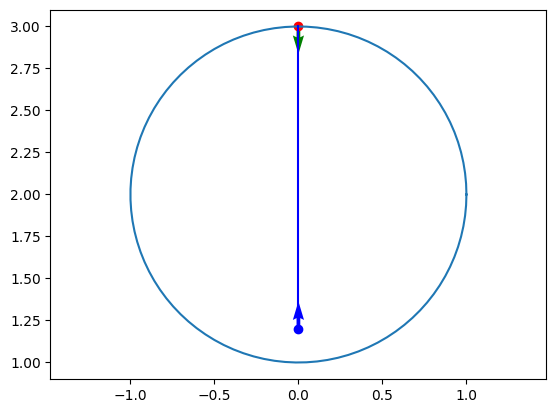

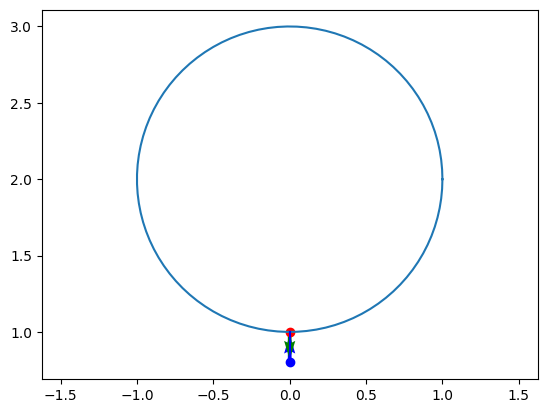

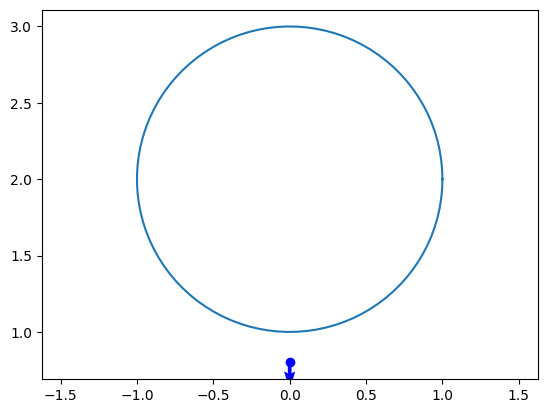

In [6]:
dibujar_interseccion_esfera_foton(esfera, f_dentro)
dibujar_interseccion_esfera_foton(esfera, f_fuera)
dibujar_interseccion_esfera_foton(esfera, f_fuera_2)

In [7]:
# Como tiene indice de regracción constante
# no cambia con la frecuencia
esfera.material.indice_refraccion.calcular(1000)

1.44

## Interfase

In [8]:
from entidades.interfase import Interfase

# Esfera
centro = np.array([0, 2, 0])
radio = 1
esfera = Esfera(centro, radio)
# Interfase aire esfera
interfase = Interfase(esfera)

# Foton
pos_foton = np.array([0, 0.8, 0])
dire_foton = np.array([1, 1, 0])
foton = SimulatedPhoton(1, pos = pos_foton, dire = dire_foton)

# Obtenemos la intersección
interseccion, n = esfera.interseccion(foton)
print(interseccion, n)

[0.22583426 1.02583426 0.        ] [ 0.22583426 -0.97416574  0.        ]


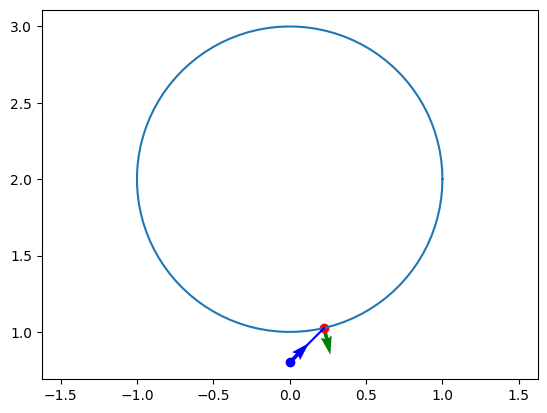

In [9]:
dibujar_interseccion_esfera_foton(esfera, foton)

In [10]:
new_dire_reflect = interfase.reflect(foton, n)
print(new_dire_reflect)
indice_exterior = interfase.indiceExterior()
indice_interior = interfase.indiceInterior()
print(indice_exterior)
print(indice_interior)
new_dire_refract = interfase.refract(foton, n, indice_exterior, indice_interior)
print(new_dire_refract)

[ 0.9461073  -0.32385333  0.        ]
1.0
1.44
[0.39157063 0.92014805 0.        ]


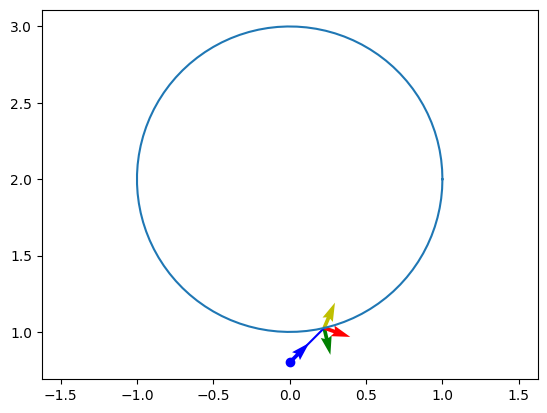

In [11]:
# Dibujamos el conjunto del proceso, junto con la reflexión y refracción
plt.scatter(pos_foton[0], pos_foton[1], c='b')
plt.quiver(pos_foton[0], pos_foton[1], dire_foton[0], dire_foton[1], color='b')

plt.quiver(interseccion[0], interseccion[1], n[0], n[1], color='g')
plt.quiver(interseccion[0], interseccion[1], new_dire_reflect[0], new_dire_reflect[1], color='r')
plt.quiver(interseccion[0], interseccion[1], new_dire_refract[0], new_dire_refract[1], color='y')
plt.plot([pos_foton[0], interseccion[0]], [pos_foton[1], interseccion[1]], c='b')

x_esf, y_esf = esfera.getPlotCoords()
plt.plot(x_esf, y_esf)
plt.xlim(-2,2)
plt.ylim(0,4)
plt.axis('equal')
plt.show()

In [12]:
angulo = np.pi/2
dire_foton = np.array([np.cos(angulo), np.sin(angulo), 0])
foton = SimulatedPhoton(1, pos = pos_foton, dire = dire_foton)
interseccion, n = esfera.interseccion(foton)
new_dire, result = interfase.interactuar(n, foton, verbose = 1)

 ni 1.0, nt 1.44
Ru 0.03251814028486965
tetai 0.0 tetat 0.0
Fotón 1 se refracta.


[1.2246468e-17 1.0000000e+00 0.0000000e+00] [ 1.2246468e-17 -1.0000000e+00  0.0000000e+00]


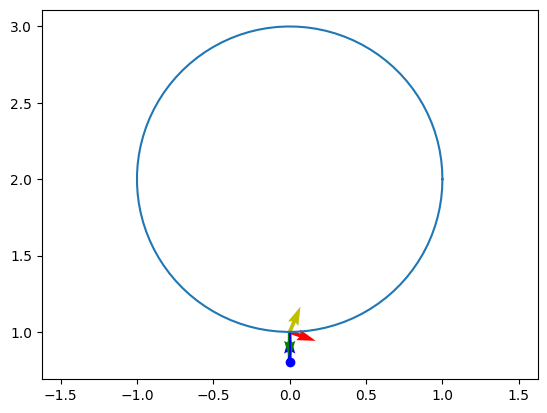

In [13]:
# Obtenemos la intersección
interseccion, n = esfera.interseccion(foton)
print(interseccion, n)
# Dibujamos el conjunto del proceso, junto con la reflexión y refracción
plt.scatter(pos_foton[0], pos_foton[1], c='b')
plt.quiver(pos_foton[0], pos_foton[1], dire_foton[0], dire_foton[1], color='b')

plt.quiver(interseccion[0], interseccion[1], n[0], n[1], color='g')
plt.quiver(interseccion[0], interseccion[1], new_dire_reflect[0], new_dire_reflect[1], color='r')
plt.quiver(interseccion[0], interseccion[1], new_dire_refract[0], new_dire_refract[1], color='y')
plt.plot([pos_foton[0], interseccion[0]], [pos_foton[1], interseccion[1]], c='b')

x_esf, y_esf = esfera.getPlotCoords()
plt.plot(x_esf, y_esf)
plt.xlim(-2,2)
plt.ylim(0,4)
plt.axis('equal')
plt.show()

# Fuente de fotones

In [14]:
from entidades.fuente import FuenteMonocromatica
from utilidades.aleatorios import GenerateRandomNormalAngle, GenerateRandomUniformPosition2D

In [15]:
fuente = FuenteMonocromatica(1000, 0)
fuente_uniforme = FuenteMonocromatica(1000, 0, GenerateRandomUniformPosition2D)
fuente_angulo = FuenteMonocromatica(1000, 0, dispersion_ang=GenerateRandomNormalAngle)

In [16]:
# Para distribución normal usar mean y std
fotones_normal = fuente.emitirN(10000, 0, 5)
# Para uniforme, es entre [mean-std, mean+std]
fotones_uniforme = fuente_uniforme.emitirN(1000, 0, 2.5)
# Para distribución de ángulo, usar los argumentos correspondientes
fotones_angulo = fuente_angulo.emitirN(20, 0, 0, mean_ang=np.pi/2, std_ang=np.pi/4)

In [17]:
print(len(fotones_normal))
print(len(fotones_uniforme))
print(len(fotones_angulo))
for f in fotones_angulo:
  print(f)

10000
1000
20
Fotón con id 1 en posición [0. 0. 0.] y dirección [-0.03949762  0.99921966  0.        ]
Fotón con id 2 en posición [0. 0. 0.] y dirección [0.01385244 0.99990405 0.        ]
Fotón con id 3 en posición [0. 0. 0.] y dirección [0.17519119 0.98453443 0.        ]
Fotón con id 4 en posición [0. 0. 0.] y dirección [-0.31662326  0.94855138  0.        ]
Fotón con id 5 en posición [0. 0. 0.] y dirección [-0.45954589  0.88815403  0.        ]
Fotón con id 6 en posición [0. 0. 0.] y dirección [-0.9730652   0.23053006  0.        ]
Fotón con id 7 en posición [0. 0. 0.] y dirección [0.82887489 0.55943401 0.        ]
Fotón con id 8 en posición [0. 0. 0.] y dirección [ 0.93805523 -0.34648576  0.        ]
Fotón con id 9 en posición [0. 0. 0.] y dirección [-0.24271297  0.97009815  0.        ]
Fotón con id 10 en posición [0. 0. 0.] y dirección [0.9947479  0.10235534 0.        ]
Fotón con id 11 en posición [0. 0. 0.] y dirección [-0.51191087  0.85903857  0.        ]
Fotón con id 12 en posición 

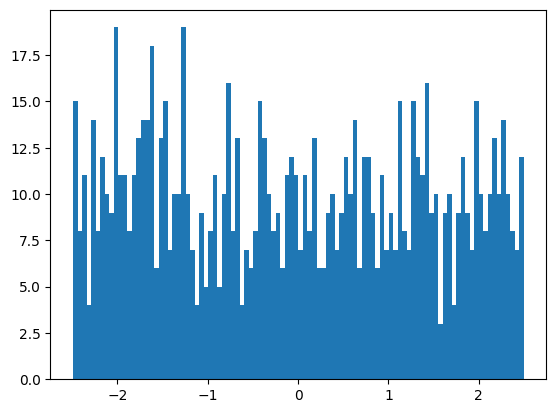

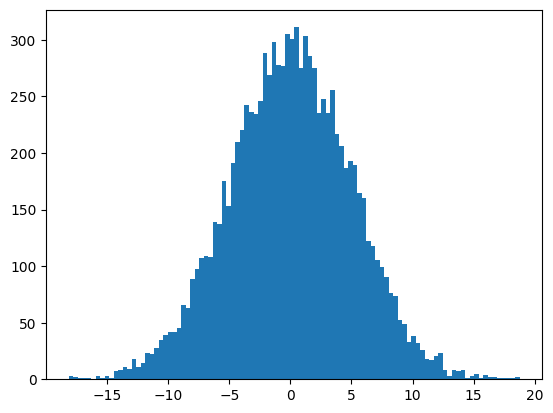

In [18]:
x_pos_uniform = [f.pos[0] for f in fotones_uniforme]
x_pos_normal = [f.pos[0] for f in fotones_normal]
# Histograma de posiciones
plt.hist(x_pos_uniform, bins=100)
plt.show()
plt.hist(x_pos_normal, bins = 100)
plt.show()

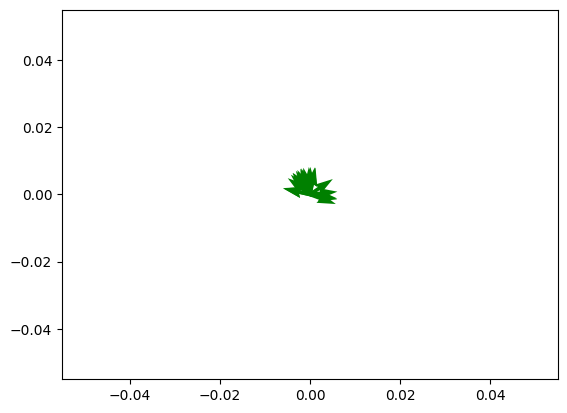

In [19]:
# Dibujamos los vectores de dirección unitarios
for f in fotones_angulo:
  plt.quiver(f.pos[0], f.pos[1], f.dire[0], f.dire[1], color='g')
plt.show()

# Recorrido entero

In [1]:
from entidades.estructura import Esfera
from entidades.interfase import Interfase
from entidades.fuente import FuenteMonocromatica
from utilidades.aleatorios import GenerateRandomUniformPosition2D, GenerateRandomUniformAngle
import numpy as np

In [6]:
import matplotlib.pyplot as plt

def draw_fotones_hist(fotones, esfera, expand = True):
  x_esf, y_esf = esfera.getPlotCoords()
  plt.plot(x_esf, y_esf)
  plt.xlim(-2, 2)
  plt.ylim(0, 4)
  plt.gca().set_aspect('equal', adjustable='box')
  
  for foton in fotones:
    pos_hist = [p[0] for p in foton.poshist]
    x = [p[0] for p in pos_hist]
    y = [p[1] for p in pos_hist]
    plt.plot(x, y, c='b', alpha=0.05)
    
    # Dibujamos el vector de salida en la última posición
    if expand:
      plt.quiver(x[-1], y[-1], foton.dire[0], foton.dire[1], color='r')
    plt.quiver(x[-1], y[-1], foton.dire[0], foton.dire[1], color='r')
  
  plt.show()

In [7]:
import matplotlib.pyplot as plt

def draw_foton_hist(foton, esfera):
  x_esf, y_esf = esfera.getPlotCoords()
  plt.plot(x_esf, y_esf)
  plt.xlim(-2, 2)
  plt.ylim(0, 4)
  plt.gca().set_aspect('equal', adjustable='box')
  
  pos_hist = [p[0] for p in foton.poshist]
  x = [p[0] for p in pos_hist]
  y = [p[1] for p in pos_hist]
  plt.plot(x, y, c='b', alpha=0.05)
  
  # Dibujamos el vector de salida en la última posición
  plt.quiver(x[-1], y[-1], foton.dire[0], foton.dire[1], color='r')
  plt.show()

In [8]:
# Esfera
centro = np.array([0, 2, 0])
radio = 1
esfera = Esfera(centro, radio)

# Fuente
fuente = FuenteMonocromatica(origen = 0, dispersion_pos=GenerateRandomUniformPosition2D)
interfase = Interfase(esfera)

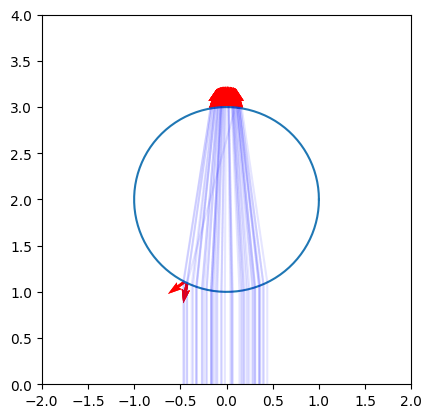

In [9]:
fotones = fuente.emitirN(50, 0, 0.5)
# fotones_activos = []
fotones_inactivos = []
for f in fotones:
  while True:
    p_int, n = esfera.interseccion(f)
    if p_int[0]==None:
      fotones_inactivos.append(f)
      break
    
    new_dire, result = interfase.interactuar(n, f)
    
    if result == "reflect" and f.spa == 0:
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      fotones_inactivos.append(f)
      break
    
    if result == "refract" and f.spa == 1:
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      fotones_inactivos.append(f)
      continue
    
    if result == "refract":
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      continue
    
    if result == "reflect":
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      continue
  
draw_fotones_hist(fotones_inactivos, esfera)

    

In [10]:
from utilidades.aleatorios import GenerateRandomUniformAngle
fuente_angular = FuenteMonocromatica(origen = 0,
                                     dispersion_pos=GenerateRandomUniformPosition2D,
                                     dispersion_ang=GenerateRandomUniformAngle)

Tiempo de ejecución:  0.11212730407714844


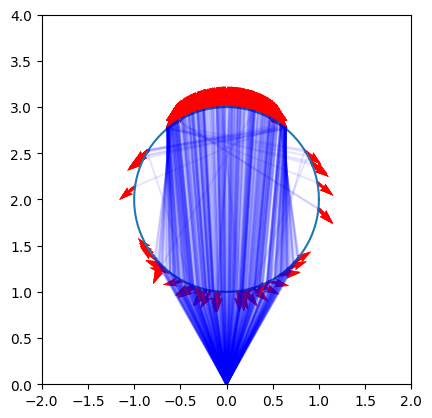

In [ ]:
import time
fotones = fuente_angular.emitirN(500, 0, 0, std_ang=np.pi/6)
# fotones_activos = []
fotones_inactivos = []
time_start = time.time()
for f in fotones:
  while True:
    p_int, n = esfera.interseccion(f)
    if p_int[0]==None:
      fotones_inactivos.append(f)
      break
    try:
      new_dire, result = interfase.interactuar(n, f)
    except:
      # dibujar_interseccion_esfera_foton(esfera, f)
      print(p_int, n)
      raise Exception("Error")
    
    if result == "reflect" and f.spa == 0:
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      fotones_inactivos.append(f)
      break
    
    if result == "refract" and f.spa == 1:
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      fotones_inactivos.append(f)
      continue
    
    if result == "refract":
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      continue
    
    if result == "reflect":
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      continue
time_end = time.time()
print("Tiempo de ejecución: ", time_end - time_start)
# draw_fotones_hist(fotones_inactivos, esfera)

In [ ]:
def GenExpMonteCarlo(mu):
  return -np.log(np.random.rand())/mu
  

def probAbs(l, mu = 0.1):
  labs = GenExpMonteCarlo(mu)
  # print("L absorcion", labs)
  # print("L recorrida", l)
  # print("\n")
  if labs > l:
    return False
  else:
    return True
  

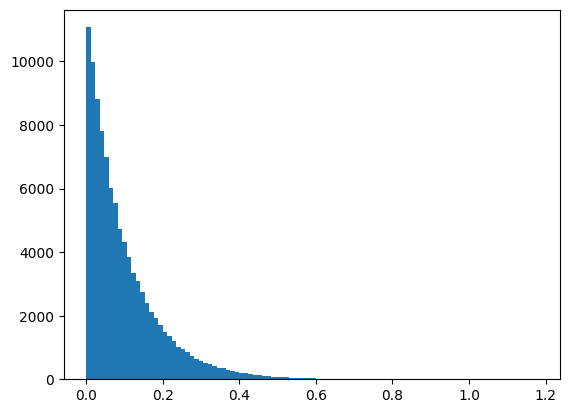

In [53]:
values = []
for i in range(100000):
  values.append(GenExpMonteCarlo(10))

plt.hist(values, bins=100)
plt.show()


In [43]:
# Esfera
centro = np.array([0, 2, 0])
radio = 1
esfera = Esfera(centro, radio)

from utilidades.aleatorios import GenerateRandomUniformAngle
fuente_angular = FuenteMonocromatica(origen = 0,
                                     dispersion_pos=GenerateRandomUniformPosition2D,
                                     dispersion_ang=GenerateRandomUniformAngle)

Tiempo de ejecución:  0.007311820983886719


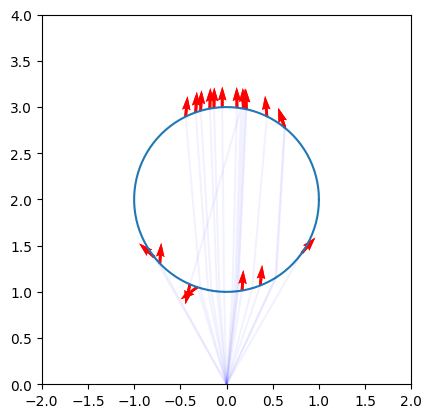

Fotones absorbidos:  3
Fotones total:  20


In [60]:
import time
fotones = fuente_angular.emitirN(20, 0, 0, std_ang=np.pi/6)
# fotones_activos = []
fotones_inactivos = []
time_start = time.time()
# Fotones absorbidos
n_abs = 0
for f in fotones:
  while True:
    p_int, n = esfera.interseccion(f)
    if p_int[0]==None:
      fotones_inactivos.append(f)
      break
    try:
      new_dire, result = interfase.interactuar(n, f)
    except:
      # dibujar_interseccion_esfera_foton(esfera, f)
      print(p_int, n)
      raise Exception("Error")
    
    # Está en el aire y se refleja
    if result == "reflect" and f.spa == 0:
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      fotones_inactivos.append(f)
      break
    
    # Está en la esfera y se refracta
    # Antes de refractarse, se calcula la probabilidad de absorción
    if result == "refract" and f.spa == 1:
      longitud_recorrida = np.linalg.norm(p_int - f.pos)
      absorbido = probAbs(longitud_recorrida)
      if absorbido:
        n_abs += 1
        fotones_inactivos.append(f)
        break
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      fotones_inactivos.append(f)
      break
    
    # Está en en el aire y se refracta
    if result == "refract":
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      continue
    
    # Está en la esfera y se refleja
    # Antes de reflejarse, se calcula la probabilidad de absorción
    if result == "reflect":
      longitud_recorrida = np.linalg.norm(p_int - f.pos)
      absorbido = probAbs(longitud_recorrida)
      if absorbido:
        n_abs += 1
        fotones_inactivos.append(f)
        break
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      continue
time_end = time.time()
print("Tiempo de ejecución: ", time_end - time_start)
draw_fotones_hist(fotones_inactivos, esfera)
print("Fotones absorbidos: ", n_abs)
print("Fotones total: ", len(fotones))

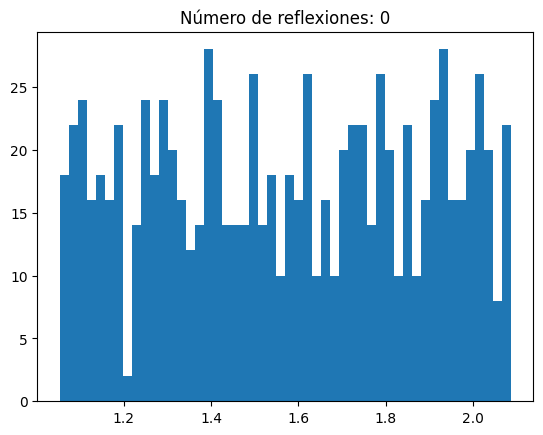

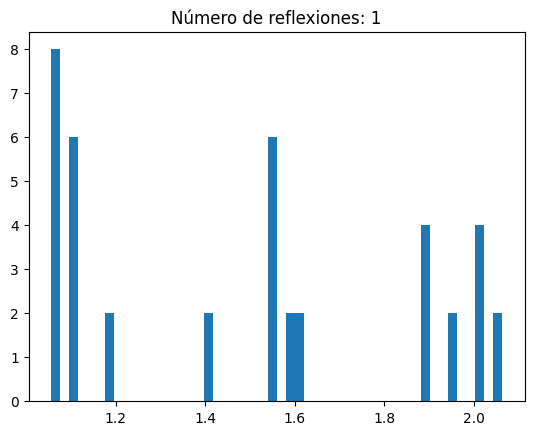

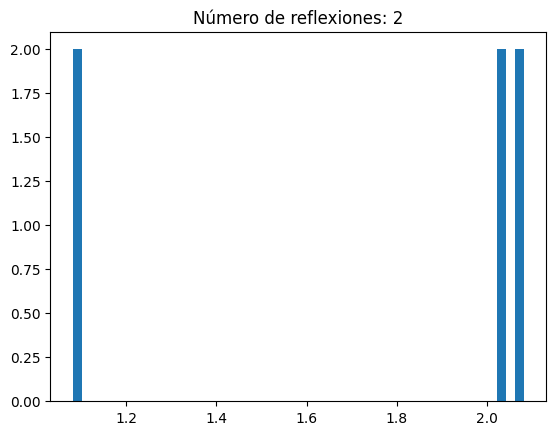

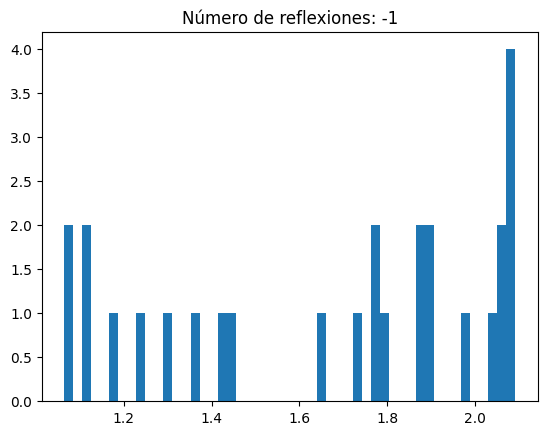

In [31]:
# ángulo inicial
angulos = []
# Reflexiones
reflexiones = []
for f in fotones_inactivos:
  dire_init = f.dirhist[0]
  angulo = np.arccos(np.dot(dire_init, np.array([1, 0, 0])))
  angulos.append(angulo)
  reflexiones.append(f.getNumeroReflexiones())

# Para cada número de reflexiones, dibujamos el histograma de ángulos
reflexiones_set = set(reflexiones)
for r in reflexiones_set:
  angulos_r = [a for i, a in enumerate(angulos) if reflexiones[i] == r]
  plt.hist(angulos_r, bins=50)
  plt.title("Número de reflexiones: " + str(r))
  # Pone en el eje x valores de pi/6 en pi/6 (radianes) escritos como pi/6
  # plt.xticks(np.arange( np.pi/2 - np.pi/6, np.pi/2 + 2*np.pi/6, np.pi/6), ['$5\pi/6$', '$\pi/6$', '$\pi/3$', '$\pi/2$'])
  # plt.show()
  # plt.xlim(1, 2)
  plt.show()

In [ ]:
from materiales.SimpleMaterial import MixedComplexMaterial 
from propiedades.IndicesRefraccion import nComplex
from entidades.estructura import Esfera

n1 = nComplex(1.6, 0)
n2 = nComplex(1.456, 1e-3)
materialComplejo = MixedComplexMaterial(n=[n1,n2], fs=[0.99, 0.01])
# Esfera
centro = np.array([0, 2, 0])
radio = 1
esfera = Esfera(centro, radio)

# Fuente
fuente = FuenteMonocromatica(origen = 0, dispersion_pos=GenerateRandomUniformPosition2D)
interfase = Interfase(esfera)

In [ ]:
import time

fotones = fuente_angular.emitirN(20, 0, 0, std_ang=np.pi/6)
# fotones_activos = []
fotones_inactivos = []
time_start = time.time()
# Fotones absorbidos
n_abs = 0
alfa = material.alfa(fotones[0].f)

for f in fotones:
  while True:
    p_int, n = esfera.interseccion(f)
    if p_int[0]==None:
      fotones_inactivos.append(f)
      break
    try:
      new_dire, result = interfase.interactuar(n, f)
    except:
      # dibujar_interseccion_esfera_foton(esfera, f)
      print(p_int, n)
      raise Exception("Error")
    
    # Está en el aire y se refleja
    if result == "reflect" and f.spa == 0:
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      fotones_inactivos.append(f)
      break
    
    # Está en la esfera y se refracta
    # Antes de refractarse, se calcula la probabilidad de absorción
    if result == "refract" and f.spa == 1:
      longitud_recorrida = np.linalg.norm(p_int - f.pos)
      absorbido = probAbs(longitud_recorrida, alfa)
      if absorbido:
        n_abs += 1
        fotones_inactivos.append(f)
        break
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      fotones_inactivos.append(f)
      break
    
    # Está en en el aire y se refracta
    if result == "refract":
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      f.alternarSpa()
      continue
    
    # Está en la esfera y se refleja
    # Antes de reflejarse, se calcula la probabilidad de absorción
    if result == "reflect":
      longitud_recorrida = np.linalg.norm(p_int - f.pos)
      absorbido = probAbs(longitud_recorrida, alfa)
      if absorbido:
        n_abs += 1
        fotones_inactivos.append(f)
        break
      f.actualizarPos(p_int)
      f.actualizarDire(new_dire)
      continue
time_end = time.time()
print("Tiempo de ejecución: ", time_end - time_start)
draw_fotones_hist(fotones_inactivos, esfera)
print("Fotones absorbidos: ", n_abs)
print("Fotones total: ", len(fotones))